In [1]:
import numpy as np

In [2]:
b=3.0   #Bond length
N=100   #Number of monomers
T=1000  #Number of conformations

In [3]:
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))
filename = 'simulation_FJC_b=3.0_N=100_T=1000.xyz'
with open(filename, 'r') as file:
    for t in range(T):
        file.readline()
        file.readline()
        for n in range(N+1):
            data = file.readline()
            x[t,n] = float(data.split()[1])
            y[t,n] = float(data.split()[2])
            z[t,n] = float(data.split()[3])    

**Calculating Q and Rg**

In [4]:
Q=[];Rg=[]
for t in range(T):
    Q.append(np.sqrt((x[t,-1]-x[t,0])**2+(y[t,-1]-y[t,0])**2+(z[t,-1]-z[t,0])**2))
    Rcm = [np.mean(x[t,:]),np.mean(y[t,:]),np.mean(z[t,:])]
    Rg.append(np.sqrt(np.mean((x[t,:]-Rcm[0])**2 + (y[t,:]-Rcm[1])**2 + (z[t,:]-Rcm[2])**2)))

In [5]:
np.size(Rg)

1000

In [6]:
np.mean(Rg)

11.957191435350206

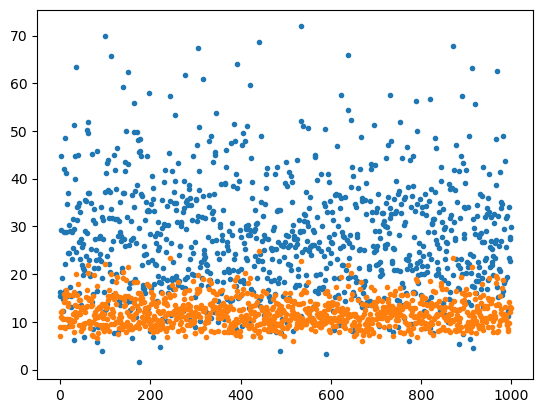

In [7]:
import matplotlib.pyplot as plt
plt.plot(Q,'.'); plt.plot(Rg,'.')

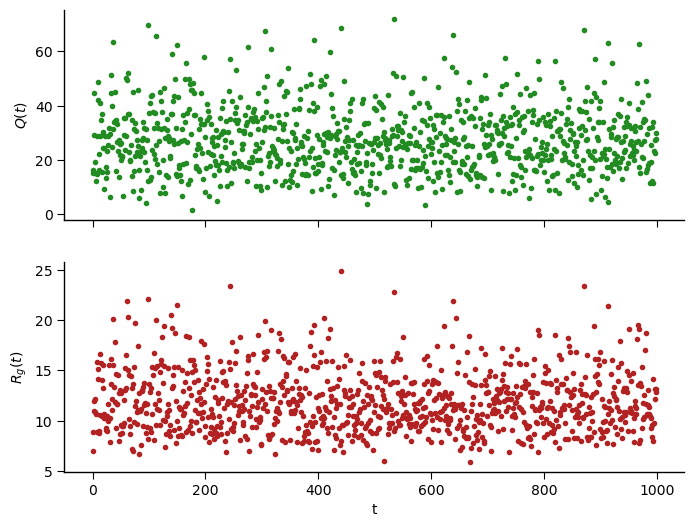

In [8]:
plt.rcParams['figure.figsize']=(8,6)
fig,axs=plt.subplots(2,1,sharex=True)
for ax in axs:
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["top"].set_linewidth(0)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(0)
    ax.grid(False)

# PLOT
axs[0].plot(Q,'.',c='forestgreen',lw=0.5)
axs[1].plot(Rg,'.',c='firebrick',lw=0.5)

# AXES
for ax in axs:
    ax.tick_params(axis='x',length=5)
    ax.tick_params(axis='y',length=5)
axs[1].set_xlabel('t')
axs[0].set_ylabel(r'$Q(t)$')
axs[1].set_ylabel(r'${R_g}(t)$')

plt.show()

*Mean Square*

In [9]:
mQ2_sim=np.mean(np.array(Q)**2)
mQ2_th=N*b*b
print('mQ2 Simulation =',mQ2_sim)
print('mQ2 Theoretical =', mQ2_th)

mQ2 Simulation = 894.1796156300001
mQ2 Theoretical = 900.0


In [10]:
mRg2_sim=np.mean(np.array(Rg)**2)
mRg2_th=N*b*b/6
print('mRG2 simulation',mRg2_sim)
print('mRG2 Theoretical',mRg2_th)

mRG2 simulation 151.94167112616037
mRG2 Theoretical 150.0


**Probability distribution of end-to-end distance N=100**

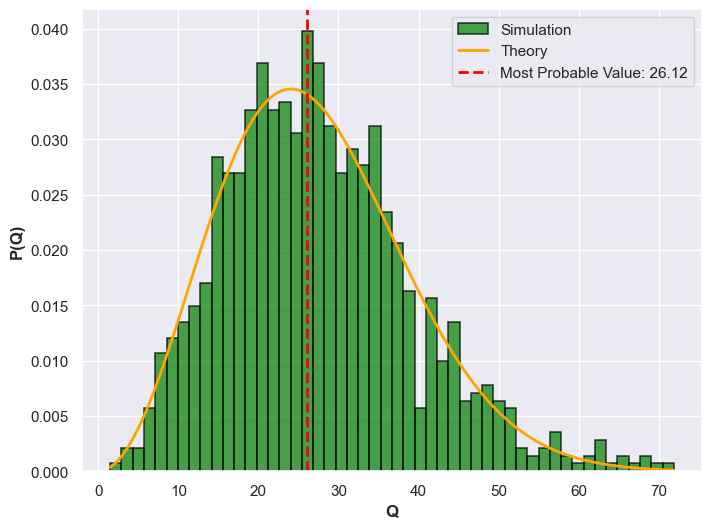

In [11]:
import seaborn as sns
from scipy.optimize import curve_fit

sns.set(style='darkgrid')

N = 100
Q_N = Q
P_Q = []
num_bins = 50
hist, bin_edges = np.histogram(Q_N, bins=num_bins, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
def fit_function(Q, N, b):
    return 4 * np.pi * Q**2 * (3 / (2 * np.pi * N * b**2))**(3 / 2) * np.exp(-3 * Q**2 / (2 * N * b**2))

params, covariance = curve_fit(fit_function, bin_centers, hist, p0=[N, b])
most_probable_value = bin_centers[np.argmax(hist)]
plt.hist(Q_N, bins=num_bins, density=True, alpha=0.7, label='Simulation', color='green', edgecolor='black', linewidth=1.2)
Q_fit = np.linspace(min(Q_N), max(Q_N), 100)
P_fit = fit_function(Q_fit, *params)
plt.plot(Q_fit, P_fit, 'orange', label='Theory', linewidth=2)
plt.axvline(most_probable_value, color='red', linestyle='dashed', linewidth=2, label=f'Most Probable Value: {most_probable_value:.2f}')

plt.ylabel('P(Q)', fontweight='bold')
plt.xlabel('Q', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()


**Structure factor**

In [14]:
N=100
def calculate_intensity_factor(x, y, z, N, k_values):
    I = np.zeros(len(k_values))
    for k_idx in range(len(k_values)):  # Iterate over k_values
        sum_sin = 0
        for i in range(N):
            for j in range(N):
                r_diff = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
                if k_values[k_idx] * r_diff != 0:
                    sum_sin += np.sin(k_values[k_idx] * r_diff) / (k_values[k_idx] * r_diff)
                else:
                    sum_sin += 1  # sinc(0) = 1
        I[k_idx] = sum_sin ** 2
    return I

k_values = np.linspace(0, 0.2, N)  # Wave vector magnitudes ranging from 0 to 0.2

# Calculate the intensity factor
I_k = calculate_intensity_factor(x[1,:], y[1,:], z[1,:], N, k_values)

I_k

array([1.00000000e+08, 9.99786463e+07, 9.99146128e+07, 9.98079817e+07,
       9.96588900e+07, 9.94675291e+07, 9.92341443e+07, 9.89590344e+07,
       9.86425509e+07, 9.82850977e+07, 9.78871297e+07, 9.74491520e+07,
       9.69717191e+07, 9.64554334e+07, 9.59009444e+07, 9.53089468e+07,
       9.46801792e+07, 9.40154231e+07, 9.33155006e+07, 9.25812729e+07,
       9.18136391e+07, 9.10135335e+07, 9.01819243e+07, 8.93198117e+07,
       8.84282255e+07, 8.75082235e+07, 8.65608890e+07, 8.55873292e+07,
       8.45886725e+07, 8.35660669e+07, 8.25206773e+07, 8.14536839e+07,
       8.03662793e+07, 7.92596669e+07, 7.81350584e+07, 7.69936718e+07,
       7.58367291e+07, 7.46654540e+07, 7.34810704e+07, 7.22847995e+07,
       7.10778585e+07, 6.98614578e+07, 6.86368000e+07, 6.74050771e+07,
       6.61674692e+07, 6.49251424e+07, 6.36792472e+07, 6.24309167e+07,
       6.11812653e+07, 5.99313868e+07, 5.86823531e+07, 5.74352127e+07,
       5.61909896e+07, 5.49506818e+07, 5.37152605e+07, 5.24856685e+07,
      

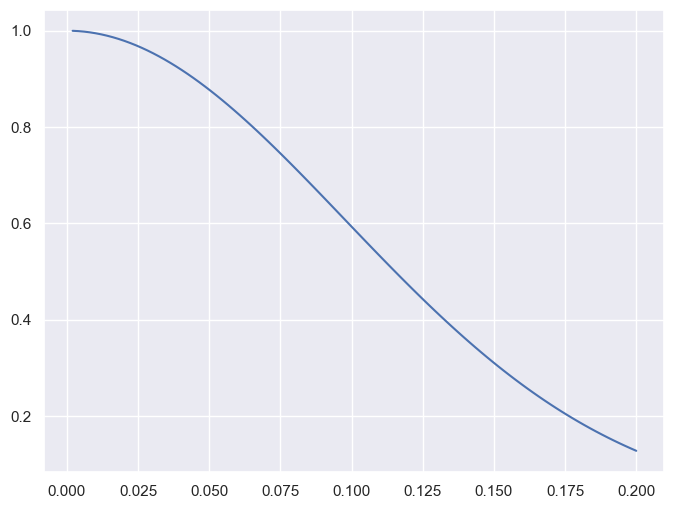

In [15]:
plt.plot(k_values[1:len(k_values)], I_k[1:len(I_k)]/100000000)

array([10201.        , 10199.01587303, 10193.06349213, 10183.1428573 ,
       10169.25396853, 10151.39682583, 10129.5714292 , 10103.77777863,
       10074.01587413, 10040.2857157 , 10002.58730333,  9960.92063703,
        9915.2857168 ,  9865.68254263,  9812.11111453,  9754.57143249,
        9693.06349652,  9627.58730662,  9558.14286279,  9484.73016502,
        9407.34921332,  9326.00000769,  9240.68254812,  9151.39683462,
        9058.14286718,  8960.92064581,  8859.73017051,  8754.57144128,
        8645.44445811,  8532.349221  ,  8415.28572997,  8294.253985  ,
        8169.2539861 ,  8040.28573326,  7907.34922649,  7770.44446579,
        7629.57145116,  7484.73018259,  7335.92066008,  7183.14288365,
        7026.39685328,  6865.68256898,  6701.00003074,  6532.34923857,
        6359.73019247,  6183.14289243,  6002.58733846,  5818.06353056,
        5629.57146872,  5437.11115295,  5240.68258325,  5040.28575961,
        4835.92068204,  4627.58735054,  4415.2857651 ,  4199.01592573,
      

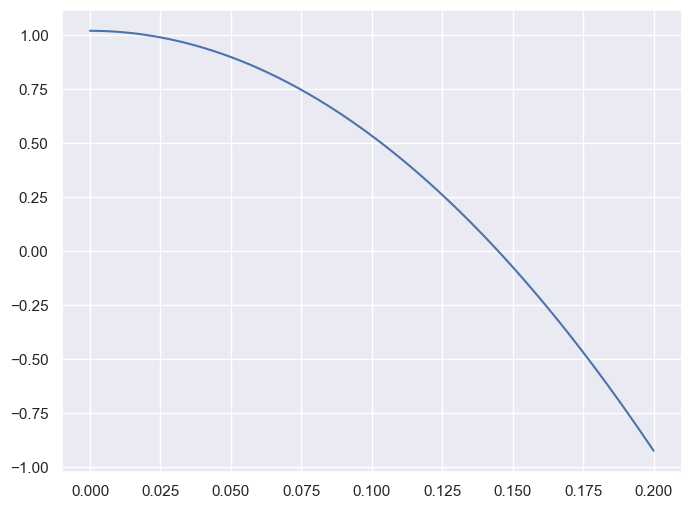

In [16]:
def guinier(N, k_values, Rg):
    # Theoretical intensity factor
    I_theoretical = (N + 1)**2 * (1 - (k_values * Rg)**2 / 3)
    return I_theoretical

# Example usage
Rg = np.mean(Rg)
I_theoretical = guinier(N, k_values, Rg)

plt.plot(k_values,I_theoretical/10000)
I_theoretical# These will be the calculated and theoretical intensity factors I(k)

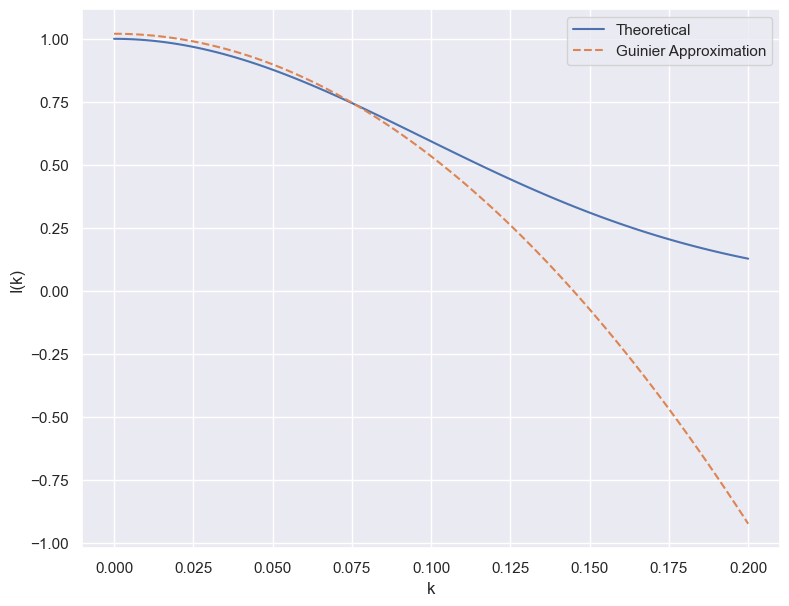

In [17]:
plt.figure(figsize=(9, 7))
plt.plot(k_values, I_k/100000000, label='Theoretical')
plt.plot(k_values, I_theoretical/10000, label='Guinier Approximation', linestyle='--')
plt.xlabel('k')
plt.ylabel('I(k)')
plt.legend()
plt.grid(True)
plt.show()


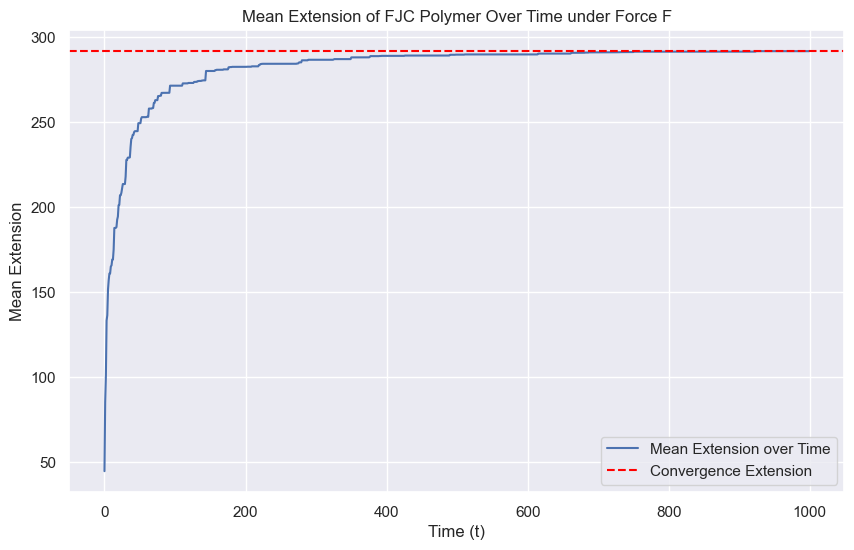

291.78903329778984

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def metropolis_step(x, y, z, F, T, kb):
    N = len(x)
    i = np.random.randint(N)  # Choose a random bond to modify, except the last one
    scale_factor=0.00001
    # Current potential energy
    Q_current = [x[-1] - x[0], y[-1] - y[0], z[-1] - z[0]]
    V_current = -F * Q_current[0]  # Potential energy

    # Modify the bond vector with a smaller change
    new_x = x.copy()
    new_y = y.copy()
    new_z = z.copy()

    delta_x, delta_y, delta_z = np.random.normal(scale=scale_factor, size=3)
    delta_norm = np.sqrt(delta_x**2 + delta_y**2 + delta_z**2)
    delta_x, delta_y, delta_z = (b / delta_norm) * np.array([delta_x, delta_y, delta_z])

    # Update positions of subsequent monomers
    for j in range(i + 1, N):
        new_x[j] = new_x[j - 1] + delta_x
        new_y[j] = new_y[j - 1] + delta_y
        new_z[j] = new_z[j - 1] + delta_z

    # New potential energy
    Q_new = [new_x[-1] - new_x[0], new_y[-1] - new_y[0], new_z[-1] - new_z[0]]
    V_new = -F * Q_new[0]  # New potential energy

    energy_diff = (V_new - V_current) / (kb * T)
    if energy_diff < 0:
        return new_x, new_y, new_z
    else:
        return x, y, z  # Reject the move

    # Metropolis criterion
    if np.random.rand() < np.exp(energy_diff):
        return new_x, new_y, new_z  # Accept the move
    else:
        return x, y, z  # Reject the move


def calculate_extensions_over_time(x, y, z, F, T, kb, num_steps, b):
    extensions = np.zeros(num_steps)
    for t in range(num_steps):
        x, y, z = metropolis_step(x, y, z, F, T, kb)
        # Calculate the end-to-end distance vector
        Q = [x[-1] - x[0], y[-1] - y[0], z[-1] - z[0]]
        extensions[t] = np.abs(Q[0])  # Projection on the x-axis
    return extensions

# Constants
N = 100       # Number of monomers
kb = 1.38e-23 # Boltzmann constant
T = 300      # Temperature in Kelvin
F = 10       # Force value
b = 3
num_steps = 1000 # Number of Metropolis steps

# Boltzmann constant in J/K
kb_J_per_K = 1.38e-23 

# Convert kb to Hartrees/K (1 Hartree = 4.36 x 10^-18 J)
kb_Hartrees_per_K = kb_J_per_K / (4.36e-18)

# Now kb is in Hartrees/K, consistent with energy in atomic units and length in angstroms
# Initial positions of monomers
X, Y, Z = x[1,:], y[1,:], z[1,:]
# Calculating the extensions over time
def run_multiple_simulations(num_simulations, num_steps, x, y, z, F, T, kb, b):
    all_extensions = np.zeros((num_simulations, num_steps))
    for i in range(num_simulations):
        # Generate new random initial positions for each simulation
        x_sim, y_sim, z_sim = x, y, z
        extensions = calculate_extensions_over_time(x_sim, y_sim, z_sim, F, T, kb, num_steps, b)
        all_extensions[i] = extensions

    # Calculate the mean extension at each position
    mean_extensions = np.mean(all_extensions, axis=0)
    return mean_extensions

# Constants for the simulation
num_simulations = 10
num_steps = 1000

# Run multiple simulations and calculate mean extensions
mean_extensions = run_multiple_simulations(num_simulations, num_steps, X, Y, Z, F, T, kb_Hartrees_per_K, b)
# Plotting the mean extensions with a red dashed line to indicate convergence
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_steps), mean_extensions, label='Mean Extension over Time')

# Adding a red dashed line to indicate the convergence point
convergence_extension = 292  # Adjust this value as needed
plt.axhline(y=convergence_extension, color='red', linestyle='--', label='Convergence Extension')

plt.xlabel('Time (t)')
plt.ylabel('Mean Extension')
plt.title('Mean Extension of FJC Polymer Over Time under Force F')
plt.legend()
plt.show()
last_point = mean_extensions[-1]
last_point
